<a href="https://colab.research.google.com/github/Tiago-Lima/CreditRiskStudy/blob/main/ArvoresDeDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as Bibliotecas básicas


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Importando a Base de Risco de Crédito

In [7]:
import pickle
with open('data/risco_credito.pkl','rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [9]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [10]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [11]:
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [12]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

[Text(0.6, 0.9166666666666666, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.4, 0.75, 'x[0] <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.4166666666666667, 'x[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3, 0.25, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8, 0.75, 'x[0] <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5833333333333334, 'x[0] <= 0.5\nentropy = 0.65\nsamples = 6\nva

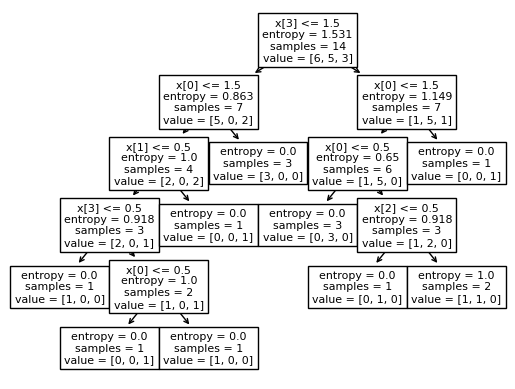

In [13]:
from sklearn import tree
tree.plot_tree(arvore_risco_credito)